KNN (K Nearest Neighbours)

KNN adalah model machine learning yang dapat digunakan untuk melakukan
prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.

Prediksi yang dilakukan dapat diterapkan baik pada classification maupun
regression tasks.

A. Siapkan Dataset yang Akan Digunakan

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadvariansholeh","key":"ae1f437e2b0a0dc734980f5774716d8e"}'}

1. Upload File kaggle.json

-	Mengunggah file kaggle.json ke Google Colab.
-	File ini adalah file autentikasi API Kaggle yang berisi username dan key API Anda.
-	Fungsinya untuk memungkinkan Google Colab mengakses dan mengunduh dataset dari Kaggle.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

2. Konfigurasi Direktori Kaggle

-	mkdir -p ~/.kaggle: Membuat folder .kaggle di dalam direktori home jika belum ada. Folder ini digunakan untuk menyimpan file kredensial kaggle.json.
-	cp kaggle.json ~/.kaggle: Menyalin file kaggle.json yang baru saja diunggah ke folder .kaggle agar bisa digunakan oleh CLI Kaggle.
-	chmod 600 ~/.kaggle/kaggle.json: Mengatur izin file agar hanya pengguna saat ini yang dapat mengakses file tersebut. Hal ini meningkatkan keamanan karena mencegah orang lain membaca atau memodifikasi file.

In [4]:
!kaggle datasets download -d waqi786/cats-dataset

Dataset URL: https://www.kaggle.com/datasets/waqi786/cats-dataset
License(s): apache-2.0
  0% 0.00/5.52k [00:00<?, ?B/s]
100% 5.52k/5.52k [00:00<00:00, 13.1MB/s]


3. Mengunduh Dataset dari Kaggle

-	Perintah ini menggunakan Kaggle CLI untuk mengunduh dataset cats-dataset dari akun Kaggle pengguna waqi786.
-	Dataset akan diunduh dalam format .zip ke direktori kerja Google Colab (/content).

In [5]:
!unzip /content/cats-dataset.zip

Archive:  /content/cats-dataset.zip
  inflating: cats_dataset.csv        


4. Ekstraksi File ZIP

-	Mengekstrak file yang diunduh (cats-dataset.zip) agar dapat digunakan. Hasil ekstraksi biasanya berupa file CSV, JSON, gambar, atau format lain tergantung isi dataset.
-	Dalam contoh ini, file yang diekstrak adalah cats_dataset.csv, yang dapat digunakan untuk analisis data.

B. Membuat Classification dengan K-Nearest Neighbors (KKN)



In [7]:
import pandas as pd

cat = {
    'Age (Years)': [19,3,10,16,11,12,8,4],
    'Weight (kg)': [7,9,3,6,8,5,2,4],
    'Gender': [
        'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female'
    ]
}

cat_df = pd.DataFrame(cat)
cat_df

,Age (Years),Weight (kg),Gender
0,19,7,Male
1,3,9,Male
2,10,3,Male
3,16,6,Male
4,11,8,Female
5,12,5,Female
6,8,2,Female
7,4,4,Female


1. Membuat Dataset

-	import pandas as pd: Mengimpor pustaka pandas untuk analisis dan manipulasi data.
-	pd.DataFrame(): Membuat tabel data (DataFrame) dari dictionary Python.

DataFrame berisi informasi kucing dengan kolom:
-	Age (Years): Umur kucing dalam tahun.
-	Weight (kg): Berat badan kucing dalam kilogram.
-	Gender: Jenis kelamin kucing (Male/Female).

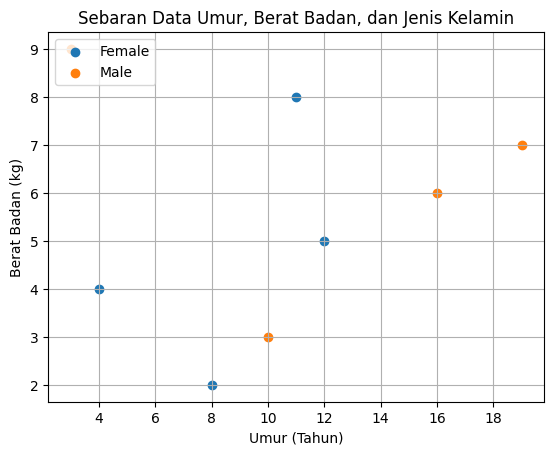

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for gender, d in cat_df.groupby('Gender'):
    ax.scatter(d['Age (Years)'], d['Weight (kg)'], label=gender)

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

2. Visualisasi Sebaran Data

- import matplotlib.pyplot as plt: Mengimpor pustaka matplotlib untuk visualisasi data.
- cat_df.groupby(): Mengelompokkan data berdasarkan kolom Gender.
- ax.scatter(): Membuat scatter plot untuk setiap kelompok data.
- plt.legend(): Menambahkan legenda untuk membedakan kategori.
- plt.title(): Memberikan judul grafik.
- plt.xlabel() dan plt.ylabel(): Menambahkan label pada sumbu X dan Y.
- plt.grid(): Menambahkan grid pada grafik.
- plt.show(): Menampilkan grafik.

In [9]:
import numpy as np

X_train = np.array(cat_df[['Age (Years)', 'Weight (kg)']])
y_train = np.array(cat_df['Gender'])
print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[19  7]
 [ 3  9]
 [10  3]
 [16  6]
 [11  8]
 [12  5]
 [ 8  2]
 [ 4  4]]

y_train: ['Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female']


3. Menyiapkan Data untuk Model

-	import numpy as np: Mengimpor pustaka NumPy untuk komputasi numerik.
-	np.array(): Mengubah DataFrame menjadi array NumPy.
-	cat_df[['Age (Years)', 'Weight (kg)']]: Memilih kolom fitur (Age dan Weight).
-	cat_df['Gender']: Memilih kolom target (Gender).

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]


4. Encoding Label Target

-	from sklearn.preprocessing import LabelBinarizer: Mengimpor fungsi untuk mengubah data kategorikal menjadi numerik.
-	LabelBinarizer(): Membuat objek encoder.
-	lb.fit_transform(): Mengubah data Gender menjadi nilai numerik:

Male → 1

Female → 0

In [11]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 1 1 1 0 0 0 0]


5. Flatten Label Target

- .flatten(): Mengubah array 2D menjadi array 1D.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

6. Membuat dan Melatih Model KNN

-	from sklearn.neighbors import KNeighborsClassifier: Mengimpor algoritma KNN dari pustaka scikit-learn.
-	KNeighborsClassifier(n_neighbors=K): Membuat model KNN dengan K = 3.
-	.fit(): Melatih model menggunakan data training (X_train dan y_train).

In [13]:
umur = 19
berat_badan = 7
X_new = np.array([umur, berat_badan]).reshape(1, -1)
X_new

array([[19,  7]])

7. Data Baru untuk Prediksi

-	np.array(): Membuat array dari data baru.
-	.reshape(1, -1): Mengubah bentuk array agar sesuai dengan input model.

In [14]:
y_new = model.predict(X_new)
y_new

array([1])

8. Melakukan Prediksi

-	.predict(): Menggunakan model KNN untuk memprediksi label data baru.

In [15]:
lb.inverse_transform(y_new)

array(['Male'], dtype='<U6')

9. Konversi Prediksi ke Label

- .inverse_transform(): Mengembalikan label numerik hasil prediksi ke bentuk aslinya (Male/Female).

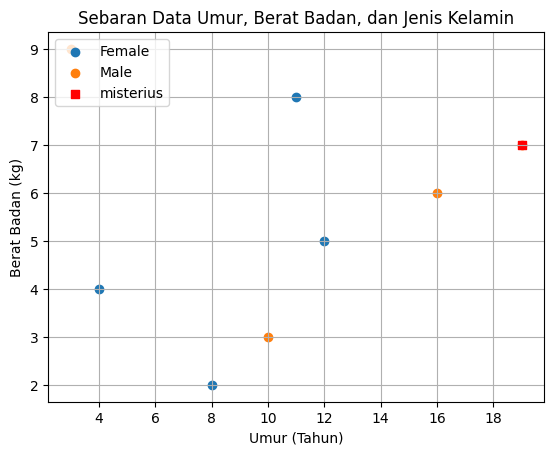

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for gender, d in cat_df.groupby('Gender'):
    ax.scatter(d['Age (Years)'], d['Weight (kg)'], label=gender)

plt.scatter(umur, berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

10. Visualisasi Data Baru

- Menampilkan titik data baru (dengan warna merah) pada scatter plot yang ada.

In [17]:
misterius = np.array([umur, berat_badan])
misterius

array([19,  7])

11. Menyimpan Data Baru

- Menyimpan data baru sebagai array untuk analisis lebih lanjut.

In [28]:
X_train

array([[19,  7],
       [ 3,  9],
       [10,  3],
       [16,  6],
       [11,  8],
       [12,  5],
       [ 8,  2],
       [ 4,  4]])

12. Menampilkan Data Training

- Menampilkan fitur data training untuk referensi.

In [18]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[0.0,
 16.1245154965971,
 9.848857801796104,
 3.1622776601683795,
 8.06225774829855,
 7.280109889280518,
 12.083045973594572,
 15.297058540778355]

13. Menghitung Jarak

-	from scipy.spatial.distance import euclidean: Mengimpor fungsi jarak Euclidean.
-	euclidean(): Menghitung jarak antara dua titik dalam ruang multidimensi.


In [19]:
cat_df['Jarak'] = data_jarak
cat_df.sort_values(['Jarak'])

,Age (Years),Weight (kg),Gender,Jarak
0,19,7,Male,0.000000
3,16,6,Male,3.162278
5,12,5,Female,7.280110
4,11,8,Female,8.062258
2,10,3,Male,9.848858
6,8,2,Female,12.083046
7,4,4,Female,15.297059
1,3,9,Male,16.124515


14. Menambahkan Kolom Jarak

-	cat_df['Jarak'] = data_jarak: Menambahkan kolom baru berisi jarak ke data baru.
-	.sort_values(): Mengurutkan data berdasarkan jarak.


In [20]:
X_test = np.array([[19, 7], [16, 6], [12, 5], [11, 8]])
y_test = lb.transform(np.array(['Male', 'Male', 'Female', 'Female'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[19  7]
 [16  6]
 [12  5]
 [11  8]]

y_test:
[1 1 0 0]


15. Data Testing

- Membuat dataset uji (test set) untuk mengevaluasi model.

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0])

16. Prediksi pada Data Testing

- Melakukan prediksi label untuk data uji menggunakan model KNN.

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 1.0


In [23]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


● Melakukan prediksi label untuk data uji menggunakan model KNN.

In [24]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [25]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 1.0


In [26]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [27]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 1.0


17. Evaluasi Model

a.	Accuracy
- Menghitung persentase prediksi benar.

b.	Precision
- Menghitung ketepatan model dalam memprediksi kelas tertentu.

c.	Recall
- Mengukur sensitivitas model dalam mengenali kelas tertentu.

d.	F1-Score
- Rata-rata harmonis antara Precision dan Recall.

e.	Classification Report
- Memberikan ringkasan metrik evaluasi.

f.	MCC
- Mengukur korelasi antara label prediksi dan asli.